In [ ]:
# pip install PyQt5

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import sys
import monkdata as m
import dtree as d
import drawtree_qt5 as dtq


The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.

In [ ]:
#Assignemnt 1
print(d.entropy(m.monk1))
print(d.entropy(m.monk2))
print(d.entropy(m.monk3))

1.0
0.957117428264771
0.9998061328047111


Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as in- stances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?

In [ ]:
monks = [m.monk1, m.monk2, m.monk3]

for monk in monks:
  for i in range(0,len(m.attributes)):
    print("MONK-"+str(monks.index(monk)) + " a." + str(i+1) + ": "+ str(round(d.averageGain(monk,m.attributes[i]),5)))

MONK-0 a.1: 0.07527
MONK-0 a.2: 0.00584
MONK-0 a.3: 0.00471
MONK-0 a.4: 0.02631
MONK-0 a.5: 0.28703
MONK-0 a.6: 0.00076
MONK-1 a.1: 0.00376
MONK-1 a.2: 0.00246
MONK-1 a.3: 0.00106
MONK-1 a.4: 0.01566
MONK-1 a.5: 0.01728
MONK-1 a.6: 0.00625
MONK-2 a.1: 0.00712
MONK-2 a.2: 0.29374
MONK-2 a.3: 0.00083
MONK-2 a.4: 0.00289
MONK-2 a.5: 0.25591
MONK-2 a.6: 0.00708


Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and test datasets.
Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.

In [ ]:
#task 5
t1=d.buildTree(m.monk1, m.attributes)

print("Errors")
print("\n")
print("For monk1")
print("Training data: " +str(1-d.check(t1, m.monk1)))
print( "Test data: "+ str(1-d.check(t1, m.monk1test)))
print("\n")
t2=d.buildTree(m.monk2, m.attributes)
print("For monk2")
print("Training data: " +str(1-d.check(t2, m.monk2)))
print( "Test data: "+ str(1-d.check(t2, m.monk2test)))
print("\n")
t3=d.buildTree(m.monk3, m.attributes)
print("For monk3")
print("Training data: " +str(1-d.check(t3, m.monk3)))
print( "Test data: "+ str(1-d.check(t3, m.monk3test)))


#print(t1)

Errors


For monk1
Training data: 0.0
Test data: 0.17129629629629628


For monk2
Training data: 0.0
Test data: 0.30787037037037035


For monk3
Training data: 0.0
Test data: 0.05555555555555558


In [ ]:
dtq.drawTree(t1)
# dt.drawTree(t_2) 
# dt.drawTree(t_3) 

Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter fraction ∈ {0.3,0.4,0.5,0.6,0.7,0.8}. Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them. 

In [ ]:
fraction = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [ ]:
import random
import numpy as np

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def getBestTree(variousWaysToPruneTree, valSet):
    allAcc = []
    for pruned in variousWaysToPruneTree:
        accuracy = d.check(pruned, valSet)
        allAcc.append(accuracy)
    bestAcc = max(allAcc)
    return variousWaysToPruneTree[allAcc.index(bestAcc)], bestAcc

def applyPruningAndReturnStatistics(traindata, testdata, fractions):
  mean = [] #these two lists will contain statistics per fraction runs
  variance = []
  mean_before = [] 
  variance_before = []

  for fr in fractions: #run each fraction
    allBestRunsForThisFraction = []
    accuracyBeforePruning = []
    
    for j in range(1000):
      tr_data, val_data = partition(traindata, fr)
      tree = d.buildTree(tr_data, m.attributes)
      bestTree = tree
      bestAccuracy = d.check(tree, val_data)

      while (True):
          possibleWaysToPruneTree = d.allPruned(bestTree)

          if (len(possibleWaysToPruneTree) == 0):
              break

          bestPrunedTree, accuracy = getBestTree(possibleWaysToPruneTree, val_data)

          if (accuracy >= bestAccuracy):
              bestTree = bestPrunedTree
              bestAccuracy = accuracy
          else:
              break

      #next, save the accuracy of the best tree against the test-data
      allBestRunsForThisFraction.append(1 - d.check(bestTree, testdata))
      accuracyBeforePruning.append(1 - d.check(tree, testdata))

    #save statistics for all runs of this fraction before pruning
    mean_before.append(np.mean(accuracyBeforePruning)) 
    variance_before.append(np.var(accuracyBeforePruning)) 

    #save statistics for all runs of this fraction after pruning
    mean.append(np.mean(allBestRunsForThisFraction)) 
    variance.append(np.var(allBestRunsForThisFraction)) 
    
  return mean,variance, mean_before, variance_before

In [ ]:
mean_monk1, variance_monk1, mean_monk1_before, variance_monk1_before = applyPruningAndReturnStatistics(m.monk1, m.monk1test, fraction) 
mean_monk3, variance_monk3, mean_monk3_before, variance_monk3_before = applyPruningAndReturnStatistics(m.monk3, m.monk3test, fraction) 

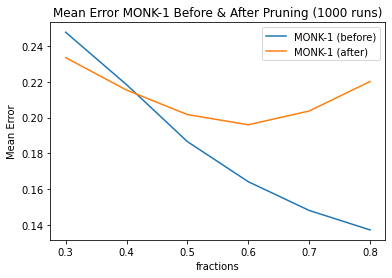

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fraction, mean_monk1_before, label = "MONK-1 (before)")
plt.plot(fraction, mean_monk1, label = "MONK-1 (after)")
plt.xlabel('fractions')
plt.ylabel('Mean Error')
plt.title('Mean Error MONK-1 Before & After Pruning (1000 runs)')
plt.legend()
plt.show()


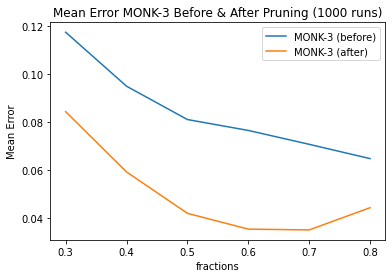

In [ ]:
plt.plot(fraction, mean_monk3_before, label = "MONK-3 (before)")
plt.plot(fraction, mean_monk3, label = "MONK-3 (after)")
plt.xlabel('fractions')
plt.ylabel('Mean Error')
plt.title('Mean Error MONK-3 Before & After Pruning (1000 runs)')
plt.legend()
plt.show()

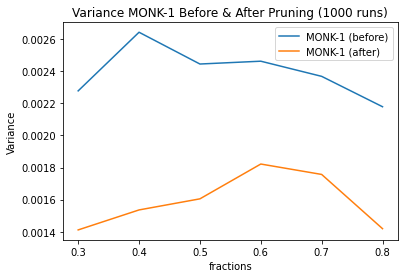

In [ ]:
plt.plot(fraction, variance_monk1_before, label = "MONK-1 (before)")
plt.plot(fraction, variance_monk1, label = "MONK-1 (after)")
plt.xlabel('fractions')
plt.ylabel('Variance')
plt.title('Variance MONK-1 Before & After Pruning (1000 runs)')
plt.legend()
plt.show()

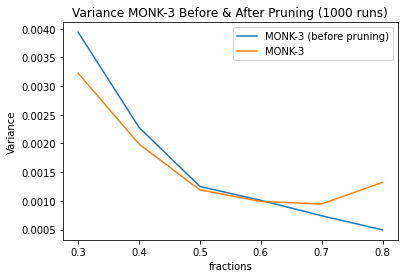

In [ ]:
plt.plot(fraction, variance_monk3_before, label = "MONK-3 (before pruning)")
plt.plot(fraction, variance_monk3, label = "MONK-3")
plt.xlabel('fractions')
plt.ylabel('Variance')
plt.title('Variance MONK-3 Before & After Pruning (1000 runs)')
plt.legend()
plt.show()